In [ ]:
!mkdir data_faces && wget https://s3-us-west-1.amazonaws.com/udacity-dlnfd/datasets/celeba.zip 

In [3]:
import zipfile

with zipfile.ZipFile("celeba.zip","r") as zip_ref:
    zip_ref.extractall("data_faces/")

In [7]:
import requests
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from skimage.io import imread
from sklearn.model_selection import train_test_split

In [10]:
import cv2, glob
import skimage
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
 
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
%matplotlib inline
from IPython.display import clear_output


In [11]:
WEIGHTS_FOLDER = './model/'
if not os.path.exists(WEIGHTS_FOLDER):
  os.makedirs(os.path.join(WEIGHTS_FOLDER,"AE"))
  os.makedirs(os.path.join(WEIGHTS_FOLDER,"VAE"))

In [12]:
import numpy as np
import cv2

def generate_random_block_mask(image, min_block_size=20, max_block_size=60):
    height, width, _ = image.shape
    mask = np.zeros((height, width), dtype=np.uint8)

    block_width = np.random.randint(min_block_size, max_block_size + 1)
    block_height = np.random.randint(min_block_size, max_block_size + 1)

    x1 = np.random.randint(0, width - block_width)
    y1 = np.random.randint(0, height - block_height)
    x2 = x1 + block_width
    y2 = y1 + block_height

    mask[y1:y2, x1:x2] = 1

    return mask

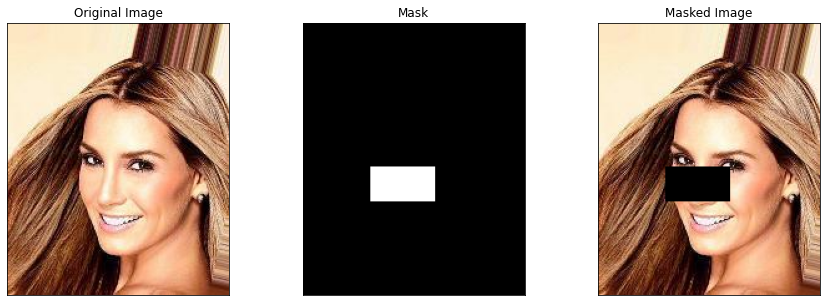

In [13]:
import cv2
import matplotlib.pyplot as plt

# Load an image from the CelebA dataset
image_path = "data_faces/img_align_celeba/000001.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Generate a random block mask for the image
mask = generate_random_block_mask(image)

# Apply the mask to the image
masked_image = image.copy()
masked_image[mask == 1] = 0

# Display the original image, mask, and masked image
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(image)
axs[0].set_title("Original Image")
axs[1].imshow(mask, cmap="gray")
axs[1].set_title("Mask")
axs[2].imshow(masked_image)
axs[2].set_title("Masked Image")

for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

In [14]:
import os
import cv2
import random
import numpy as np

def random_block_mask(image, block_size=(64, 64)):
    h, w, _ = image.shape
    x = random.randint(0, w - block_size[0])
    y = random.randint(0, h - block_size[1])
    masked_image = image.copy()
    masked_image[y:y + block_size[1], x:x + block_size[0]] = 0
    return masked_image

input_dir = "data_faces/img_align_celeba/"
output_dir = "data_faces/masked_images/"

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

for file_name in os.listdir(input_dir):
    input_path = os.path.join(input_dir, file_name)
    output_path = os.path.join(output_dir, file_name)

    image = cv2.imread(input_path)

    if image is not None:
        masked_image = random_block_mask(image)
        cv2.imwrite(output_path, masked_image)
    else:
        print(f"Image {input_path} not found or not loaded correctly.")